In [305]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [306]:
words = open('/content/name.txt','r').read().splitlines()

In [307]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [308]:
len(words)

32033

In [309]:
# build the vocabulary of characters and mapping to from integers

cahrs = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(cahrs)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [310]:
# build the dataset

block_size = 3 # context length: how many characters do we take to
X,Y = [],[]
for w in words:
  print(w)
  context = [0]*block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '----->',itos[ix])
    context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

Streaming output truncated to the last 5000 lines.
doron
dovi
draysen
dredyn
dugan
durell
ebin
edwardo
efrem
ehaan
ehab
eirik
eldar
eliav
eligio
eloi
eluzer
elway
emaad
emeka
enki
ero
erron
esaiah
estiven
eulalio
everet
everly
evert
evian
eyas
ezer
ezren
faaris
facundo
famous
farzan
felton
field
filipe
finbar
finch
flynt
fordham
fouad
gabryel
garnet
gaurik
gavi
geovonni
germany
gerrard
gevorg
giuliani
graden
gradyn
grayer
grayton
greylen
grimm
gurshaan
hameed
hanzel
hasib
haylen
henning
herminio
hill
hiyan
hrihaan
huxson
hykeem
ihsaan
imer
imir
iremide
isahi
isaih
ishak
ishank
issachar
issam
issiah
iyaan
izai
izick
jabbar
jabri
jaccob
jadarrius
jadin
jaecion
jaelin
jaelon
jaevon
jah
jahcere
jahmeer
jahvon
jahzir
jaidin
jaishawn
jakaree
jakorey
jalan
jameis
jansiel
janthony
janziel
jarom
jaseer
jaston
jatavion
jathniel
javarius
jawuan
jaxel
jaxxyn
jaxzon
jayace
jaydien
jayke
jaymere
jayniel
jayonni
jayston
jayziah
jazen
jazion
jeramie
jeramyah
jerek
jeremey
jeren
jeric
jerman
jermani
je

In [311]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [312]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [313]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

First we need to make the lookup table C

In [314]:
C = torch.randn((27,2))

In [315]:
C

tensor([[-0.3275, -0.0590],
        [-1.2702, -0.2877],
        [-0.0578,  0.2298],
        [ 0.7102,  1.6084],
        [-0.1095, -0.7356],
        [ 0.2212,  0.0337],
        [ 1.2518, -0.2511],
        [ 0.0343, -0.2817],
        [-0.4373,  1.3784],
        [ 2.0867, -0.2218],
        [ 1.6094, -0.4649],
        [ 1.7678, -0.4093],
        [ 0.0044,  0.6237],
        [ 1.0733, -0.7451],
        [-1.1451, -0.1203],
        [-0.6837, -0.1120],
        [-2.0969, -0.7934],
        [ 0.0813,  1.6004],
        [-2.1100, -0.4930],
        [-0.2608,  1.1411],
        [-1.3651, -0.6819],
        [-0.7759,  0.6005],
        [ 1.6905, -0.8252],
        [ 0.8280, -0.6515],
        [-1.2889,  1.1917],
        [-0.1979, -0.1836],
        [ 1.6109, -1.1564]])

In [316]:
C[5]

tensor([0.2212, 0.0337])

In [317]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C


tensor([0.2212, 0.0337])

In [318]:
C[5]

tensor([0.2212, 0.0337])

In [319]:
C[[5,6,7]]

tensor([[ 0.2212,  0.0337],
        [ 1.2518, -0.2511],
        [ 0.0343, -0.2817]])

In [320]:
C[X]

tensor([[[-0.3275, -0.0590],
         [-0.3275, -0.0590],
         [-0.3275, -0.0590]],

        [[-0.3275, -0.0590],
         [-0.3275, -0.0590],
         [ 0.2212,  0.0337]],

        [[-0.3275, -0.0590],
         [ 0.2212,  0.0337],
         [ 1.0733, -0.7451]],

        ...,

        [[ 1.6109, -1.1564],
         [ 1.6109, -1.1564],
         [-0.1979, -0.1836]],

        [[ 1.6109, -1.1564],
         [-0.1979, -0.1836],
         [ 1.6109, -1.1564]],

        [[-0.1979, -0.1836],
         [ 1.6109, -1.1564],
         [-1.2889,  1.1917]]])

In [321]:
C[X].shape

torch.Size([228146, 3, 2])

In [322]:
X[13,2]

tensor(1)

In [323]:
C[X][13,2]

tensor([-1.2702, -0.2877])

In [324]:
C[1]

tensor([-1.2702, -0.2877])

In [325]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [326]:
W1 = torch.rand((6,100))
b1 = torch.rand(100)


In [327]:
# emb @ W1 + b
emb.view(-1,6)@ W1 + b1

tensor([[ 0.1709,  0.0675, -0.1425,  ..., -0.1278,  0.1552,  0.1055],
        [ 0.4357,  0.4427,  0.0524,  ..., -0.0285,  0.3124,  0.3508],
        [ 0.6531,  0.4718, -0.1270,  ..., -0.2261, -0.0840,  0.2628],
        ...,
        [ 0.4483,  0.6086,  1.7396,  ..., -1.4785,  1.0781,  0.2393],
        [-0.1137,  1.5007, -0.1607,  ..., -1.2528,  0.3495, -0.3727],
        [ 1.1940, -0.1749,  2.3015,  ..., -0.2951,  1.2768,  1.1650]])

In [328]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1).shape

torch.Size([228146, 6])

In [329]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([228146, 6])

In [330]:
a = torch.arange(18)

In [331]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

As long as the multiplipcation of the number is the same, it will work

In [332]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [333]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [334]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [335]:
h = emb.view(emb.shape[0],6) @ W1 + b1

In [336]:
h.shape

torch.Size([228146, 100])

In [337]:
h = torch.tanh(emb.view(-1,6)@ W1 + b1)

In [338]:
h

tensor([[ 0.1692,  0.0674, -0.1415,  ..., -0.1271,  0.1540,  0.1051],
        [ 0.4100,  0.4159,  0.0524,  ..., -0.0285,  0.3026,  0.3371],
        [ 0.5738,  0.4396, -0.1263,  ..., -0.2223, -0.0838,  0.2570],
        ...,
        [ 0.4205,  0.5431,  0.9402,  ..., -0.9012,  0.7925,  0.2349],
        [-0.1132,  0.9053, -0.1593,  ..., -0.8491,  0.3359, -0.3563],
        [ 0.8318, -0.1731,  0.9802,  ..., -0.2868,  0.8556,  0.8227]])

In [339]:
h.shape

torch.Size([228146, 100])

In [340]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)


In [341]:
logits = h@W2 + b2

In [342]:
logits.shape

torch.Size([228146, 27])

In [343]:
counts = logits.exp()
prob = counts/counts.sum(1,keepdim=True)

In [344]:
prob.shape

torch.Size([228146, 27])

In [345]:
prob[0].sum()

tensor(1.0000)

In [346]:
# loss = -prob[torch.arange(32),Y].log().mean()

In [347]:
# loss

In [348]:
# -------------- now made respectable --------------


In [349]:
X.shape , Y.shape #dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [350]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [351]:
sum(p.nelement() for p in parameters)

3481

In [352]:
for p in parameters:
  p.requires_grad = True

In [363]:
lre =  torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [364]:
lri = []
lossi = []
for i in range(1000):

  # minibatch construct
  ix = torch.randint(0,X.shape[0],(32,))
  # print(ix)
  # forward pass
  emb = C[X[ix]] #(32,3,2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32,27)
  # counts = logits.exp()
  # prob = counts/counts.sum(1,keepdim=True)
  # loss = -prob[torch.arange(32),Y].log().mean()
  loss = F.cross_entropy(logits,Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = lrs[i]



  for p in parameters:
    p.data += -lr * p.grad

   # track stat
  lri.append(lr)
  lossi.append(loss.item())

print(loss.item())


8.815465927124023


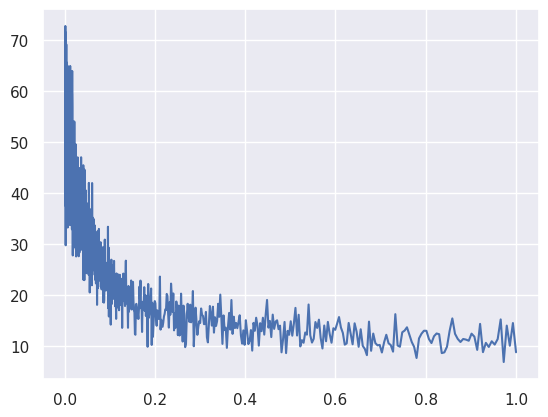

In [365]:
plt.plot(lri,lossi)

How to determine the Learning rate

In [355]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(71.2305, grad_fn=<NllLossBackward0>)